## Imports

In [27]:
from skimage import io
# from PIL import Image
import numpy as np
# import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib import image
from skimage import filters
from skimage.io import imread, imsave
from PIL import Image, ImageChops, ImageFilter

## Introduction

In [3]:
# open the images
im1 = Image.open('images/bonescan.tif')
im2 = Image.open('images/culture_shock.jpeg')
im1 = im1.convert('L')

In [4]:
# convert into numpy array
im1_np = np.asarray(im1)
im2_np = np.asarray(im2)

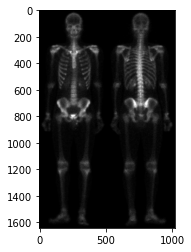

In [5]:
imgplot = plt.imshow(im1_np, 'gray')

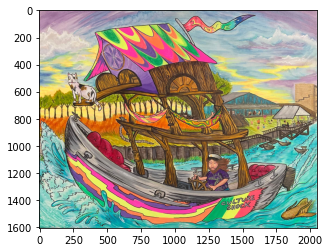

In [6]:
imgplot = plt.imshow(im2_np, 'gray')

In [7]:
print(im2.format)

JPEG


In [8]:
print("im1.shape: ", im1_np.shape)
print("im2.shape: ", im2_np.shape)


im1.shape:  (1641, 1026)
im2.shape:  (1606, 2048, 3)


## Red, Green & Blue on seperate channel:

In [9]:
#https://stackoverflow.com/a/51555134
data = im2.getdata()

# Suppress specific bands (e.g. (255, 120, 65) -> (0, 120, 0) for g)
r = [(d[0], 0, 0) for d in data]
g = [(0, d[1], 0) for d in data]
b = [(0, 0, d[2]) for d in data]

im2.putdata(r)
im2.save('images/r.png')
im2.putdata(g)
im2.save('images/g.png')
im2.putdata(b)
im2.save('images/b.png')

In [10]:
im2 = Image.open('images/culture_shock.jpeg')
im2_r = Image.open('images/r.png')
im2_g = Image.open('images/g.png')
im2_b = Image.open('images/b.png')

Text(0.5, 1.0, 'Blue')

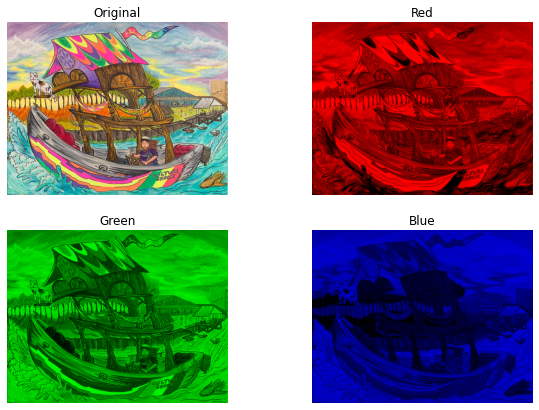

In [11]:
# code for displaying multiple images in one figure
  
#import libraries
# import cv2
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im2)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im2_r)
plt.axis('off')
plt.title("Red")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(im2_g)
plt.axis('off')
plt.title("Green")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(im2_b)
plt.axis('off')
plt.title("Blue")

## Binarization - Manual & Using Algorithm (Otsu Threshold)

In [12]:
def binarization(threshold, im):
    im1_t = im.point(lambda x: 255 if x > threshold else 0)
    return im1_t

In [13]:
# Load image as greyscale
im1_otsu = imread('images/bonescan.tif', as_gray=True)
# Get Otsu threshold - result is 42
threshold = filters.threshold_otsu(im1_otsu) 
print(threshold)

42


In [14]:
im1_50 = binarization(50, im1)
im1_100 = binarization(100, im1)
im1_150 = binarization(150, im1)
im1_200 = binarization(200, im1)
im1_42 = binarization(42, im1)

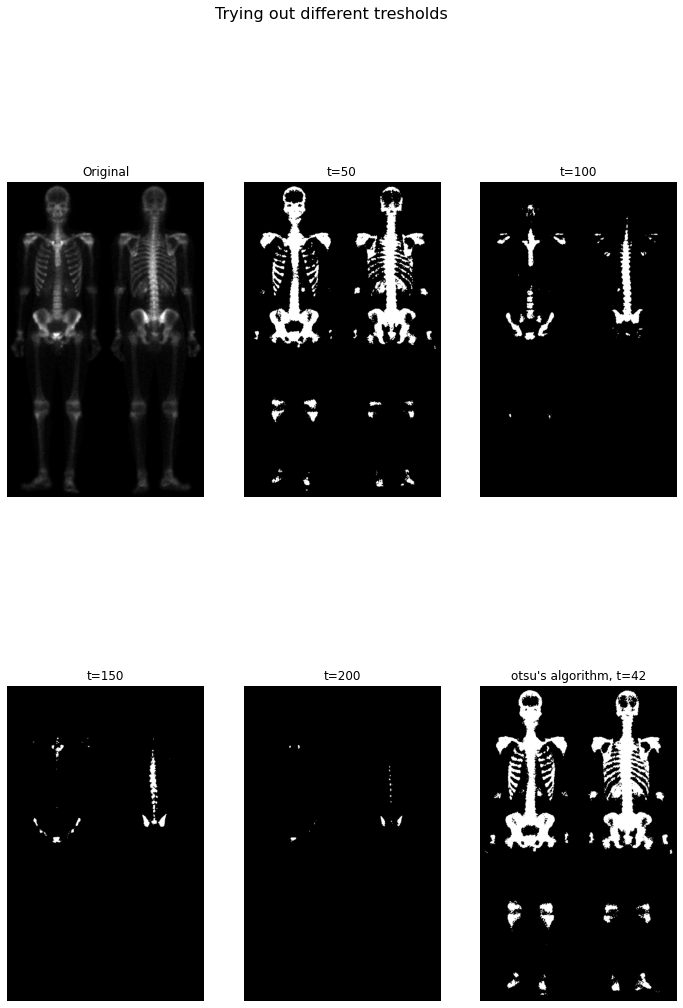

In [15]:
# code for displaying multiple images in one figure
  
# create figure
fig = plt.figure(figsize=(12, 15))
fig.suptitle('Trying out different tresholds', fontsize=16)
  
# setting values to rows and column variables
rows = 2
columns = 3
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im1, "gray")
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im1_50, "gray")
plt.axis('off')
plt.title("t=50")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(im1_100, "gray")
plt.axis('off')
plt.title("t=100")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(im1_150, "gray")
plt.axis('off')
plt.title("t=150")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(im1_200, "gray")
plt.axis('off')
plt.title("t=200")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(im1_42, "gray")
plt.axis('off')
plt.title("otsu's algorithm, t=42");

## Image Manipulation (Inversion & Rotation)

##### if the values of each (i,j)th element where i is the row and j is the column of two different images are the same, then they can be considered as equal

In [16]:
print(im2_np)

[[[228 194 208]
  [227 193 207]
  [224 190 204]
  ...
  [197 164 185]
  [201 168 189]
  [203 170 191]]

 [[217 183 199]
  [216 182 196]
  [214 180 196]
  ...
  [193 160 181]
  [194 161 182]
  [191 158 179]]

 [[202 168 185]
  [201 167 183]
  [199 165 182]
  ...
  [191 158 179]
  [189 156 177]
  [185 152 173]]

 ...

 [[ 55 126 110]
  [ 53 126 109]
  [ 53 126 109]
  ...
  [105 210 196]
  [ 96 201 187]
  [ 89 195 181]]

 [[ 70 134 120]
  [ 66 132 118]
  [ 64 130 116]
  ...
  [ 94 200 186]
  [ 83 189 175]
  [ 74 182 167]]

 [[ 78 140 127]
  [ 76 138 125]
  [ 73 135 122]
  ...
  [ 86 192 178]
  [ 72 180 165]
  [ 64 172 157]]]


In [17]:
print(im2_np.shape)

(1606, 2048, 3)


Text(0.5, 1.0, 'Rotate by 45 deg')

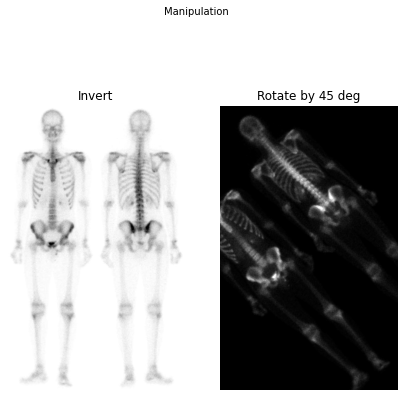

In [44]:
#1.invert image
invert = ImageChops.invert(im1)

#2. rotate
rotate = im1.rotate(45)


# code for displaying multiple images in one figure
  
# create figure
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Manipulation', fontsize=10)
  
# setting values to rows and column variables
rows = 1
columns = 2
   
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(invert, "gray")
plt.axis('off')
plt.title("Invert")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(rotate, "gray")
plt.axis('off')
plt.title("Rotate by 45 deg")
  


## Histogram


(array([145163.,  16711.,  16027.,  15299.,  15159.,  14689.,  14313.,
         14480.,  14137.,  14089.,  14288.,  14555.,  14618.,  15048.,
         15393.,  15803.,  16215.,  16687.,  17404.,  17609.,  18420.,
         18886.,  19429.,  20214.,  20800.,  21308.,  21791.,  22251.,
         23128.,  23119.,  23882.,  24302.,  24670.,  25233.,  25625.,
         26334.,  26555.,  27024.,  27277.,  27950.,  28136.,  28472.,
         29233.,  29421.,  29591.,  29848.,  30011.,  30016.,  30425.,
         30066.,  30552.,  30553.,  31307.,  31736.,  32414.,  31915.,
         31915.,  31874.,  32282.,  31994.,  32202.,  32799.,  32659.,
         32155.,  31976.,  32201.,  32007.,  32363.,  32029.,  32459.,
         32704.,  33481.,  34447.,  34245.,  34511.,  35635.,  35892.,
         36612.,  36849.,  37399.,  38007.,  38388.,  38690.,  38903.,
         38770.,  38991.,  38477.,  37988.,  36985.,  36292.,  36058.,
         35918.,  35825.,  36057.,  36879.,  35712.,  35646.,  35765.,
      

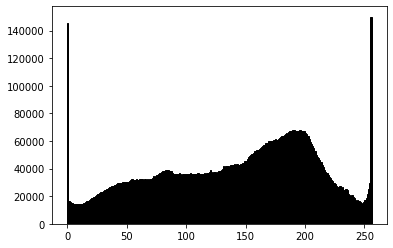

In [33]:
#Histogram for multi-color
plt.hist(im2_np.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k')


## Comment

This lab was just the right amount of challenge for me. I had to do a lot of self-learning but not so much that I have to forget everything else in life.
